# lista 1 - Análise do dataset de animes

Aluno: Erik Nonato Rolin        

Para executar as análises, não esqueça de instalar as bibliotecas necessárias em requirements.txt.

No terminal...
```bash
pip install -r requirements.txt
```
(Verifique se está na pasta do mesmo arquivo requirements.txt. Para descobrir, digite `dir` e veja se o arquivo aparece na lista)

É de suma importancia que o dataset `anime-dataset-2023.csv` esteja na pasta do arquivo de análise.

(Para descobrir, digite `dir` e veja se o arquivo aparece na lista)

------------------------------------------------------------------------------------------------------------------------------------------------------------

*Seção de imports*

In [2]:
# Manipulação de dados
import pandas as pd  # Para carregar e manipular o dataset
import numpy as np   # Para cálculos estatísticos

# Visualização de dados
import matplotlib.pyplot as plt  # Para gráficos básicos (barras, histogramas, etc.)
import seaborn as sns            # Para gráficos mais bonitos e estatísticos

*Pegando o csv para pd e settando para as analises*

In [3]:
# Carregando o CSV
df = pd.read_csv('anime-dataset-2023.csv')


# Visualizar as primeiras linhas do dataset
print(df.head())



# Identificar os tipos de variáveis
print(df.dtypes)



# Separar variáveis qualitativas e quantitativas
qualitativas = df.select_dtypes(include='object').columns.tolist()
quantitativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariáveis qualitativas:", qualitativas)
print("Variáveis quantitativas:", quantitativas)


   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name Score  \
0                         カウボーイビバップ  8.75   
1                    カウボーイビバップ 天国の扉  8.38   
2                             トライガン  8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)  7.25   
4                            冒険王ビィト  6.94   

                                 Genres  \
0         Action, Award Winning, Sci-Fi   
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                               

**Começando as análises**

**Quem são os indivíduos/observações da sua base de dados?**

O dataset contém 24.905 animes como indivíduos/observações. Cada linha representa um anime único, com informações como nome, gênero, tipo, número de episódios, score, data de lançamento, popularidade, entre outras características

**Identifique os tipos das suas variáveis**

Quantitativas (numéricas):

anime_id: identificador único do anime
Episodes: número de episódios
Score: avaliação média dos usuários
Favorites: número de vezes favoritado
Members: número de membros que adicionaram o anime
Popularity: ranking de popularidade

Qualitativas (categóricas ou texto):

Name, English name, Other name: nomes do anime
Genres: gêneros associados
Type: formato (TV, Movie, OVA etc.)
Aired, Premiered: datas de lançamento
Status: status de exibição
Producers, Licensors, Studios: responsáveis pela produção
Source: origem da história (manga, original etc.)
Duration: duração média dos episódios
Rating: classificação indicativa
Rank: posição no ranking geral
Scored By: número de usuários que avaliaram
Synopsis: sinopse
Image URL: link da imagem

**Em   uma   abordagem   focada   em   problemas   (  PPDAC  ),   que   perguntas   você   pretende responder   com   a   sua   base   de   dados   e que planejamento   pretende   seguir   para respondê-las (etapas “Problema” e “Plano”) ?**

Os problemas a serem analisados neste notebook são: Onde esta realocado os "scores" dos animes? Analisar a mediana x média para observar pontos atípicos. Dos animes disponíveis, qual gêreno possui a melhor distribuição dos seus scores? Qual foi o ano com a maior quantidade de animes lançados?

**Pergunta 1**

*Problema*: Onde esta realocado os "scores" dos animes? Analisar a mediana x média para observar pontos atípicos.

*Plano*: Após realizar a limpeza do dataset, coletar os dados válidos da coluna "Score", verificar a frequencia e calcular a média e mediana para identificar  como a coluna "Score" se comporta.

*Gerando a análise*:

A média e mediana de score é (6.3808896252867715, 6.39) respectivamente


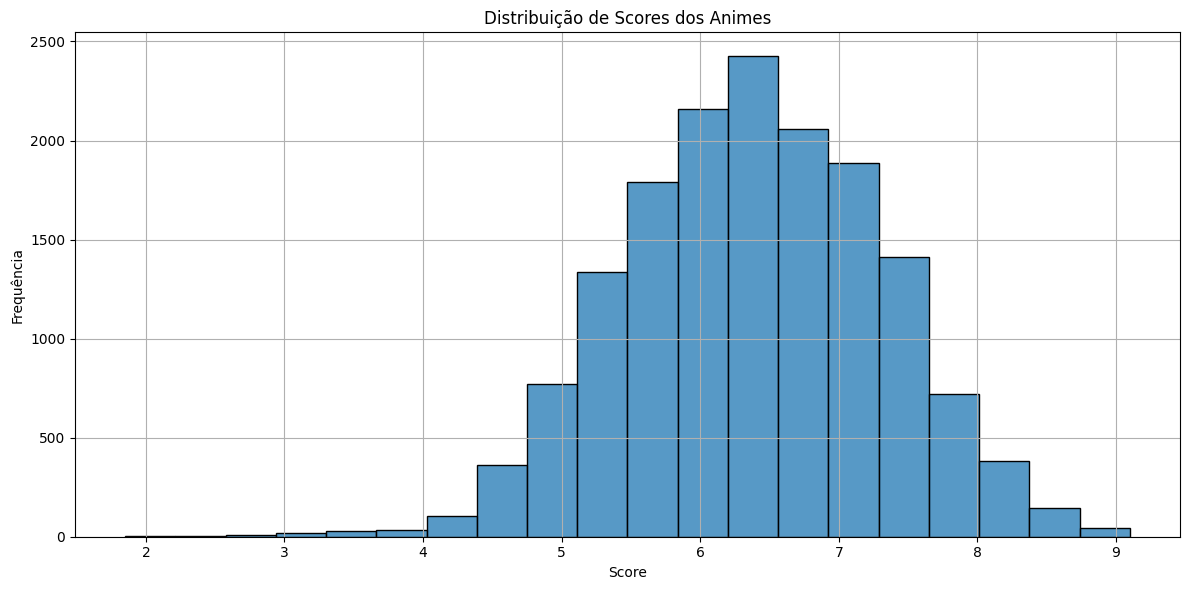

In [4]:
# Limpar a coluna 'Score' removendo valores 'UNKNOWN' e convertendo para float
df_clean = df[df['Score'].str.upper() != 'UNKNOWN'].copy()
df_clean['Score'] = pd.to_numeric(df_clean['Score'], errors='coerce')

# Remover valores nulos após conversão
df_clean = df_clean.dropna(subset=['Score'])


# Calcular média e mediana
score_media = float(df_clean['Score'].mean())
score_mediana = float(df_clean['Score'].median())

print(f"A média e mediana de score é {score_media, score_mediana} respectivamente")


# Gerar gráfico de barras da distribuição de Score
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Score'], bins=20, kde=False)
plt.title('Distribuição de Scores dos Animes')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()



*Conclusão*: Os scores se encontram majoritariamente entre as notas 6 e 7. A média e mediana estão muito similares, então, apesar de existirem pontos atípicos nos dados, eles não distorcem significativamente a distribuição. Isso indica que a maioria dos animes tende a receber avaliações medianas, com poucos casos extremos de notas muito altas ou muito baixas. A distribuição é relativamente simétrica, sugerindo uma avaliação consistente por parte dos usuário.

**Pergunta 2**

*Problema*: Dos animes disponíveis, qual gêreno possui a melhor distribuição dos seus scores?

*Plano*: Após realizar a limpeza do dataset, identificar todas as categorias de gênero. Em seguida, agrupar os similares e gerar um bloxplot para cada gênero e analisar a distribuição de cada um.

*Gerando a análise*:

(Eu tive que gerar agrupamento de gêneros para fins de uma melhor análise)

Estatísticas de Score por Grupo de Gênero:
                   mean  median   max   min
Grupo Genero                               
Aventura           6.57    6.53  8.78  3.99
Ação               6.67    6.71  9.10  2.53
Comédia            6.43    6.48  9.05  1.98
Drama              6.61    6.58  9.07  3.76
Esporte            6.93    7.04  8.78  3.62
Fantasia           6.15    6.07  8.62  3.29
Ficção Científica  6.00    6.00  8.31  1.85
Outros             6.12    6.20  8.16  2.22
Romance            6.35    6.28  8.29  2.63
Suspense/Terror    6.02    5.97  8.69  2.22


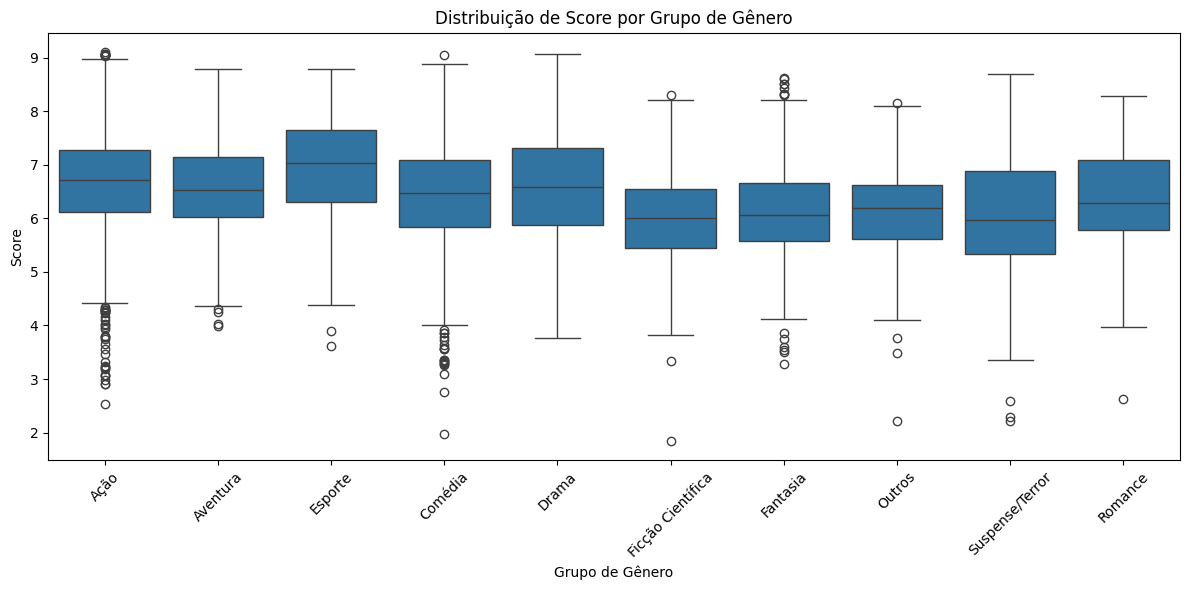

In [ ]:
# Limpar coluna 'Score'
df = df[df['Score'].notna() & (df['Score'].str.upper() != 'UNKNOWN')].copy()
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df = df.dropna(subset=['Score'])

# Definir agrupamentos de gêneros
agrupamentos = {
    'Ação': ['Action', 'Martial Arts', 'Military'],
    'Aventura': ['Adventure'],
    'Comédia': ['Comedy'],
    'Drama': ['Drama', 'Slice of Life'],
    'Fantasia': ['Fantasy', 'Supernatural', 'Magic'],
    'Romance': ['Romance', 'Girls Love', 'Boys Love'],
    'Suspense/Terror': ['Mystery', 'Suspense', 'Psychological', 'Horror'],
    'Ficção Científica': ['Sci-Fi'],
    'Esporte': ['Sports'],
    'Outros': ['Ecchi', 'Hentai', 'Erotica']
}

# Função para mapear gêneros para grupos
def mapear_grupo(generos):
    generos_lista = [g.strip() for g in str(generos).split(',')]
    for grupo, lista in agrupamentos.items():
        if any(g in lista for g in generos_lista):
            return grupo
    return None

# Aplicar mapeamento e remover desconhecidos
df['Grupo Genero'] = df['Genres'].apply(mapear_grupo)
df = df.dropna(subset=['Grupo Genero'])


# Calcular estatísticas por grupo
estatisticas = df.groupby('Grupo Genero')['Score'].agg(['mean', 'median', 'max', 'min']).round(2)

print("Estatísticas de Score por Grupo de Gênero:")
print(estatisticas) 


# Gerar boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo Genero', y='Score')
plt.title('Distribuição de Score por Grupo de Gênero')
plt.xlabel('Grupo de Gênero')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Conclusão*: Esporte lidera com a maior média e mediana, sugerindo que animes esportivos são bem avaliados de forma consistente.
Ação, Drama e Aventura também apresentam médias altas, indicando boa recepção geral.
Comédia e Romance têm médias intermediárias, com maior variação nos extremos (notas muito altas e muito baixas).
Fantasia, Suspense/Terror e Ficção Científica têm médias mais baixas, o que pode indicar maior polarização ou menor consistência na qualidade percebida.
O grupo Outros (Ecchi, Hentai, Erotica) tem média baixa, mas mediana ligeiramente superior, sugerindo que há alguns títulos bem avaliados, mas muitos com notas baixas.

**Pergunta 3**

*Problema*: Qual foi o ano com a maior quantidade de animes lançados?

*Plano*: Após realizar uma GRANDE limpeza do dataset, identificar de quais anos os animes são pertencentes. Em seguida, agrupar os animes por ano e plotar eles em um grafico de analise temporal

*Gerando a análise*:

O ano com maior número de lançamentos de animes foi 2016, com 649 animes lançados.
Frequência de lançamentos de animes por década:
Década
1910       9
1920      17
1930      63
1940      19
1950      18
1960     111
1970     274
1980     894
1990    1507
2000    3269
2010    5610
2020    1790
Name: count, dtype: int64
A decada com maior número de lançamentos de animes foi 2010, com 5610 animes lançados.
Estatísticas de lançamentos de animes por ano:
Média: 138.58
Mediana: 22.5
Mínimo: 1
Máximo: 649
Estatísticas de lançamentos de animes por decada:
Média: 1131.75
Mediana: 192.5
Mínimo: 9
Máximo: 5610
Frequência de lançamentos de animes por ano:
Ano
1917      6
1918      3
1924      1
1925      3
1926      3
       ... 
2019    535
2020    505
2021    574
2022    526
2023    185
Name: count, Length: 98, dtype: int64


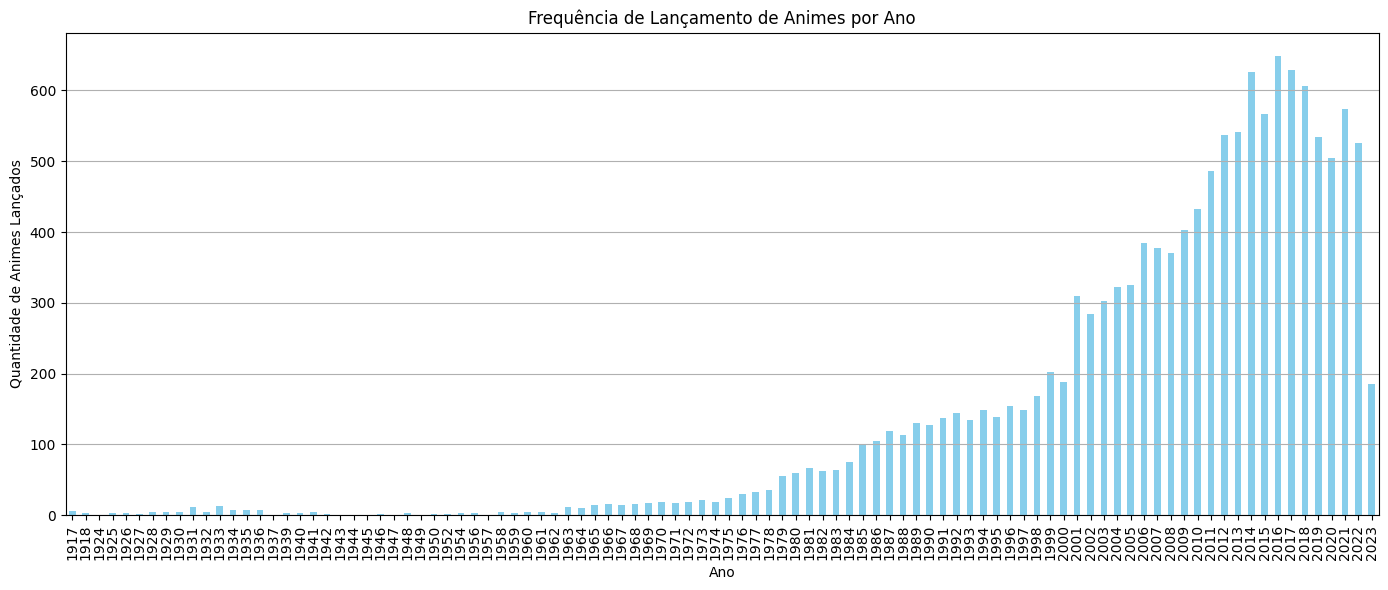

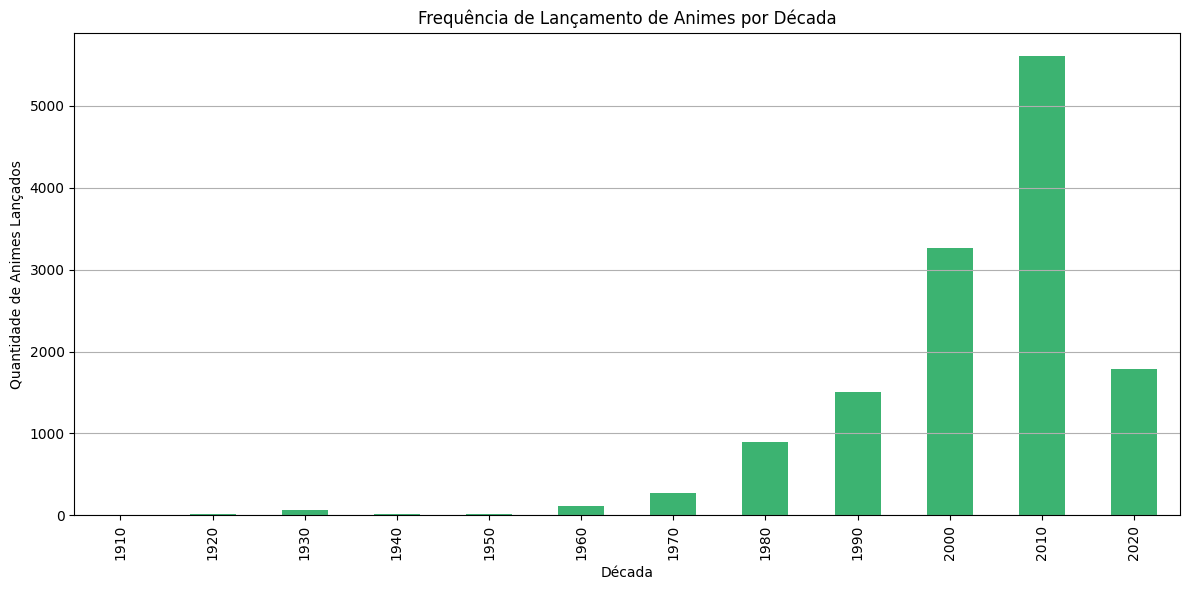

In [14]:
# Limpar e extrair o ano da coluna 'Aired'
df['Aired'] = df['Aired'].astype(str)
df = df[df['Aired'].str.contains(r'\d{4}', na=False)]
df['Ano'] = df['Aired'].str.extract(r'(\d{4})').astype(int)

# Contar frequência de lançamentos por ano
frequencia_por_ano = df['Ano'].value_counts().sort_index()

# Identificar o ano com maior número de lançamentos
ano_max_lancamentos = frequencia_por_ano.idxmax()
qtd_max_lancamentos = frequencia_por_ano.max()

print(f"O ano com maior número de lançamentos de animes foi {ano_max_lancamentos}, com {qtd_max_lancamentos} animes lançados.")


# Agrupar por década
df['Década'] = (df['Ano'] // 10) * 10
frequencia_por_decada = df['Década'].value_counts().sort_index()

# Exibir a frequência por década
print("Frequência de lançamentos de animes por década:")
print(frequencia_por_decada)

# Identificar a decada com maior número de lançamentos
decada_max_lancamentos = frequencia_por_decada.idxmax()
decada_qtd_max_lancamentos = frequencia_por_decada.max()

print(f"A decada com maior número de lançamentos de animes foi {decada_max_lancamentos}, com {decada_qtd_max_lancamentos} animes lançados.")

# Calcular estatísticas
media_por_ano = frequencia_por_ano.mean()
mediana_por_ano = frequencia_por_ano.median()
minimo_por_ano = frequencia_por_ano.min()
maximo_por_ano = frequencia_por_ano.max()

media_por_decada = frequencia_por_decada.mean()
mediana_por_decada = frequencia_por_decada.median()
minimo_por_decada = frequencia_por_decada.min()
maximo_por_decada = frequencia_por_decada.max()

print("Estatísticas de lançamentos de animes por ano:")
print(f"Média: {media_por_ano:.2f}")
print(f"Mediana: {mediana_por_ano}")
print(f"Mínimo: {minimo_por_ano}")
print(f"Máximo: {maximo_por_ano}")

print("Estatísticas de lançamentos de animes por decada:")
print(f"Média: {media_por_decada:.2f}")
print(f"Mediana: {mediana_por_decada}")
print(f"Mínimo: {minimo_por_decada}")
print(f"Máximo: {maximo_por_decada}")

# Exibir a frequência em texto
print("Frequência de lançamentos de animes por ano:")
print(frequencia_por_ano)


# Gerar gráfico de barras dos anos
plt.figure(figsize=(14, 6))
frequencia_por_ano.plot(kind='bar', color='skyblue')
plt.title('Frequência de Lançamento de Animes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Animes Lançados')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Gerar gráfico de barras por década
plt.figure(figsize=(12, 6))
frequencia_por_decada.plot(kind='bar', color='mediumseagreen')
plt.title('Frequência de Lançamento de Animes por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Animes Lançados')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*Conclusão*: A evolução da produção de animes ao longo das décadas revela uma expansão exponencial da indústria. Até os anos 1970, os lançamentos eram relativamente modestos, com menos de 600 títulos por década. A partir dos anos 1980, observa-se um crescimento mais acelerado, culminando em um salto expressivo nos anos 2000 e 2010, com mais de 10 mil lançamentos entre 2010 e 2020.

O ano de 2016 se destaca como o mais produtivo individualmente, refletindo um pico de atividade criativa e comercial. Esse crescimento está diretamente ligado a:

Globalização da cultura otaku: O anime deixou de ser um produto exclusivamente japonês e passou a ser consumido em massa por públicos internacionais, impulsionado por plataformas de streaming e redes sociais.

avanços tecnológicos: Ferramentas digitais facilitaram a produção, edição e distribuição de conteúdo animado, reduzindo custos e ampliando a capacidade de produção.

Investimento na indústria: Com o aumento da demanda global, estúdios receberam mais financiamento, permitindo a criação de novos projetos, inclusive de nicho.

Popularização de plataformas digitais: Serviços como Crunchyroll, Netflix e YouTube contribuíram para a disseminação e monetização dos animes em escala mundial.

**Conclusão final**

A análise exploratória do Anime Dataset 2023 revelou padrões interessantes sobre a produção e avaliação de animes. A partir da categorização dos gêneros, observamos que animes de esporte, ação e drama tendem a receber os maiores scores médios, enquanto gêneros como ficção científica e suspense/terror apresentam médias mais baixas. Isso pode indicar uma preferência do público por narrativas mais emocionais ou dinâmicas, embora também reflita a diversidade de estilos e públicos dentro da indústria. A distribuição dos scores é relativamente simétrica, com média e mediana próximas, sugerindo consistência nas avaliações, apesar da presença de alguns outliers.

A análise temporal mostrou uma evolução acelerada na produção de animes, especialmente entre 2010 e 2020, com destaque para o ano de 2016 como o mais produtivo individualmente. Esse crescimento está fortemente ligado à globalização da cultura otaku, ao avanço das tecnologias de animação e à expansão das plataformas digitais de distribuição, como serviços de streaming. A indústria passou de uma produção concentrada em poucos estúdios para um ecossistema diversificado, com maior investimento e alcance internacional, refletindo uma mudança estrutural na forma como o anime é consumido e valorizado.

Como continuidade da análise, seria interessante cruzar os dados de score com métricas de popularidade e membros cadastrados, para entender se os animes mais bem avaliados também são os mais assistidos. Além disso, integrar essa base com outras fontes, como dados de bilheteria, premiações ou avaliações internacionais, poderia enriquecer a compreensão sobre o impacto cultural e comercial dos animes. Também seria possível investigar a evolução dos temas e estilos ao longo das décadas, relacionando tendências narrativas com contextos históricos e sociais.